## Code to produce statistics for LAMP semeter inversion

written by Riley Troyer Summer 2021

In [1]:
# Start by defining the directories where the data is stored
proj_dir = ('/media/sf_semeter-inversion/')#LAMP_Data_saved/')

In [2]:
# Import needed libraries

from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MultipleLocator
import numpy as np
import os
import pickle
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
from scipy.integrate import quad
import scipy.signal as signal
import scipy.stats as stats

In [3]:
# Get a list of directories for inversion data
inversion_data_dir = (proj_dir +'Inversion_data/gledhill/')#+
                   #   'data/pfisr-data/inversions/'
                   #   'stanford/')
inversion_dirs = os.listdir(inversion_data_dir)
inversion_dirs = [d for d in inversion_dirs if not d.startswith('.')]
#inversion_dirs = [inversion_data_dir + d + '/' for d in inversion_dirs]
inversion_dirs = [inversion_data_dir + d+'/'  for d in inversion_dirs]

inversion_dirs = sorted(inversion_dirs)
print(inversion_dirs)
# inversion_dirs = [proj_dir]
# print(inversion_dirs)


['/media/sf_semeter-inversion/Inversion_data/gledhill/2016-10-13/', '/media/sf_semeter-inversion/Inversion_data/gledhill/2022-03-04/', '/media/sf_semeter-inversion/Inversion_data/gledhill/2022-03-05/']


In [4]:
# Loop through each directory and read inversion results
#...into single file
all_inversion_results = {}

for inversion_dir in inversion_dirs:
    
    # Look for pickle file in directory
    try:
        inversion_results_filename = [f for f in os.listdir(inversion_dir)
                                      if f.endswith('.pickle')][0]
        print(inversion_results_filename)
        
        # Read in pickle file
        with open(inversion_dir 
                  + inversion_results_filename, 'rb') as handle:
            inversion_results = pickle.load(handle)
        #print(inversion_results)
        
        # Set keys of individual day to full dictionary
        for key in inversion_results.keys():
            all_inversion_results[key] = inversion_results[key]
            #print(all_inversion_results[key])
            print(key)
    except Exception as e: print(e, inversion_dir)

#print(all_inversion_results)

inversion-data-2016-10-13.pickle
2016-10-13 12:49:56
2016-10-13 12:50:56
2016-10-13 12:51:56
2016-10-13 12:52:56
2016-10-13 12:53:56
2016-10-13 12:54:56
2016-10-13 12:55:56
2016-10-13 12:56:56
2016-10-13 12:57:56
2016-10-13 12:58:56
2016-10-13 12:59:56
2016-10-13 13:00:56
2016-10-13 13:01:56
2016-10-13 13:02:56
2016-10-13 13:03:56
2016-10-13 13:04:56
2016-10-13 13:05:56
2016-10-13 13:06:56
2016-10-13 13:07:56
2016-10-13 13:08:56
2016-10-13 13:09:56
2016-10-13 13:10:56
2016-10-13 13:11:56
2016-10-13 13:12:56
2016-10-13 13:13:56
2016-10-13 13:14:56
2016-10-13 13:15:56
2016-10-13 13:16:56
2016-10-13 13:17:56
2016-10-13 13:18:56
2016-10-13 13:19:56
2016-10-13 13:20:56
2016-10-13 13:21:56
2016-10-13 13:22:56
2016-10-13 13:23:56
2016-10-13 13:24:56
2016-10-13 13:25:56
2016-10-13 13:26:56
2016-10-13 13:27:56
2016-10-13 13:28:56
2016-10-13 13:29:56
2016-10-13 13:30:56
2016-10-13 13:31:56
2016-10-13 13:32:56
2016-10-13 13:33:56
2016-10-13 13:34:56
2016-10-13 13:35:56
2016-10-13 13:36:56
2016-10

2022-03-05 07:00:40
2022-03-05 07:01:42
2022-03-05 07:02:45
2022-03-05 07:03:49
2022-03-05 07:04:52
2022-03-05 07:05:55
2022-03-05 07:06:59
2022-03-05 07:08:02
2022-03-05 07:09:05
2022-03-05 07:10:09
2022-03-05 07:11:12
2022-03-05 07:12:15
2022-03-05 07:13:19
2022-03-05 07:14:22
2022-03-05 07:15:26
2022-03-05 07:16:29
2022-03-05 07:17:32
2022-03-05 07:18:36
2022-03-05 07:19:39
2022-03-05 07:20:42
2022-03-05 07:21:46
2022-03-05 07:22:49
2022-03-05 07:23:52
2022-03-05 07:24:56
2022-03-05 07:25:59
2022-03-05 07:27:03
2022-03-05 07:28:06
2022-03-05 07:29:09
2022-03-05 07:30:13
2022-03-05 07:31:16
2022-03-05 07:32:19
2022-03-05 07:33:23
2022-03-05 07:34:26
2022-03-05 07:35:29
2022-03-05 07:36:33
2022-03-05 07:37:36
2022-03-05 07:48:18
2022-03-05 07:49:22
2022-03-05 07:50:25
2022-03-05 07:51:28
2022-03-05 07:52:32
2022-03-05 07:53:35
2022-03-05 07:54:39
2022-03-05 07:55:42
2022-03-05 07:56:45
2022-03-05 07:57:49
2022-03-05 07:58:52
2022-03-05 07:59:55
2022-03-05 08:00:59
2022-03-05 08:02:02


In [5]:
# Read in file with substorm delay and MLT for PFISR data
# with open(proj_dir + 'data/pfisr-data/statistics/'
#           'pa-pfisr-data-dict-v20211111.pickle', 'rb') as handle:
#     pa_statistics_data = pickle.load(handle)

# with open(proj_dir + 'data/pfisr-data/statistics/'
#           'pa-pfisr-data-dict-v20220304.pickle', 'rb') as handle:
#     pa_statistics_data = pickle.load(handle)
with open(proj_dir + 'LAMP_Data_saved/pa-pfisr-data-dict-v20220305.pickle', 'rb') as handle:
    pa_statistics_data = pickle.load(handle)
#print(pa_statistics_data)

In [6]:
def get_energy_integrations(energy_bins, energy_flux, threshold):
    """Function to integrate energy flux to get values for statistics.
    INPUT
    energy_bins
        type: array of float
        about: energy bins in eV
    energy_flux
        type: array of float
        about: energy flux in eV m^-2 s^-1
    threshold
        type: float
        about: energy threshold in eV to seperate low and high energies
    OUTPUT
    high_total_energy
        type: float
        about: total energy above threshold in eV
    low_total_energy
        type: float
        about: total energy below threshold in eV
    """

    # Get closest bin to specified energy value
    threshold_i = np.argmin(abs(energy_bins - threshold))
    
    # Get low and high energy contributions
    high_total_energy = np.sum(energy_flux[threshold_i:])
    low_total_energy = np.sum(energy_flux[:threshold_i])
    
    return high_total_energy, low_total_energy

In [8]:
# Create a new dictionary to store only PA results
pa_inversion_results = {}

# Make array to store all inversion results times
inversion_times = np.array(list(all_inversion_results.keys()))
print(inversion_times)

# Loop through each time and add MLT, substorm delay, and energy calcs
for n, key in enumerate(pa_statistics_data.keys()):
    print(key)
    
    # Find the closest time in full inversion results
    delay = abs(key - inversion_times)
    #print(delay)
    
    # If there isn't a close time skip
    if np.min(delay).total_seconds() > 60:
        print('skipping')
        continue

    closest_index = np.argmin(delay)
    closest_time = inversion_times[closest_index]
    
    # Set PA dictionary to inversion results
    pa_inversion_results[closest_time]=all_inversion_results[closest_time]
    
    # Add on statistics data
    d = pa_statistics_data[key]
    pa_inversion_results[closest_time]['low_altitude'] = d['altitude']
    pa_inversion_results[closest_time]['local_time'] = d['local_time']
    pa_inversion_results[closest_time]['mlt_time'] = d['mlt_time']
    
    # Add energy data calculations
    
    # Calculate energy flux
    modeled_flux = pa_inversion_results[closest_time]['modeled_flux']
    
    # To get differential number flux need to
    #...multiply by energy bin widths
    energy_bins = pa_inversion_results[closest_time]['energy_bins']
    bin_widths = energy_bins - np.roll(energy_bins, shift=1)
    #...fix first value
    bin_widths[0] = energy_bins[0] - 0
    
    # To get differential energy flux multiply diff num flux
    #...by energy bins
    energy_flux = modeled_flux * bin_widths * energy_bins
    print(energy_flux)
    # Get integrated energy fluxes for 30, 50, and 100 keV
    #...integration removes dependences of diff energy flux on eV^-1
    #...note, flux is for entire energy bin, so just have to sum
    #...each bin value
    #...Also make sure to exclude last energy bin
    #...inversion process can cause this to be large
    total_energy = np.sum(energy_flux[0:-1])
    
    (high_energy_30, 
     low_energy_30) = get_energy_integrations(energy_bins[0:-1],
                                              energy_flux[0:-1],
                                              30000)
    (high_energy_50, 
     low_energy_50) = get_energy_integrations(energy_bins[0:-1],
                                              energy_flux[0:-1],
                                              50000)
    (high_energy_100, 
     low_energy_100) = get_energy_integrations(energy_bins[0:-1],
                                               energy_flux[0:-1],
                                               100000)
    
    # Write these to dictionaries as well
    pa_inversion_results[closest_time]['total_energy'] = total_energy
    pa_inversion_results[closest_time]['high_30keV'] = high_energy_30
    pa_inversion_results[closest_time]['low_30keV'] = low_energy_30
    pa_inversion_results[closest_time]['high_50keV'] = high_energy_50
    pa_inversion_results[closest_time]['low_50keV'] = low_energy_50
    pa_inversion_results[closest_time]['high_100keV'] = high_energy_100
    pa_inversion_results[closest_time]['low_100keV'] = low_energy_100
    #print(pa_inversion_results[closest_time]['total_energy'])
    #print(total_energy)

[datetime.datetime(2016, 10, 13, 12, 49, 56)
 datetime.datetime(2016, 10, 13, 12, 50, 56)
 datetime.datetime(2016, 10, 13, 12, 51, 56) ...
 datetime.datetime(2022, 3, 5, 20, 57, 41)
 datetime.datetime(2022, 3, 5, 20, 58, 44)
 datetime.datetime(2022, 3, 5, 20, 59, 48)]
2022-03-05 08:00:59
[0.00000000e+00 5.49230478e+13 6.95280687e+13 9.24214466e+13
 3.05579310e+14 5.42559819e+14 3.60729378e+14 1.04083870e+14
 5.54500886e+13 1.10181321e+11 4.70677296e+09 2.65505503e+09
 2.79803629e+09 3.58162694e+09 5.14791399e+09 7.88664072e+09
 1.29241278e+10 2.18770175e+10 3.34281487e+10 5.30039140e+10
 8.61015762e+10 1.46418194e+11 2.66271411e+11 5.81295479e+11
 6.29603904e+13]
2022-03-05 08:02:02
[0.00000000e+00 4.82910471e+13 5.22377448e+13 7.91245062e+13
 2.09372763e+14 6.71739277e+14 2.90313406e+14 2.16107249e+14
 3.47892258e+13 3.88345391e+10 5.18855982e+09 4.33384808e+09
 4.95764021e+09 6.62573206e+09 9.57584924e+09 1.48042211e+10
 2.37003642e+10 3.78615576e+10 6.35253164e+10 1.07101935e+11
 1.

2022-03-05 12:57:12
[0.00000000e+00 5.91808101e+13 1.56990043e+14 3.76851050e+14
 3.24225447e+14 7.12866290e+14 3.57529093e+14 3.38827185e+14
 6.69919464e+13 5.93954604e+13 5.52698928e+13 4.15158002e+13
 3.05019190e+13 3.40471241e+13 1.45262685e+14 4.71864119e+13
 6.59913532e+12 6.05593928e+13 1.41636709e+13 1.41782536e+11
 1.35173660e+11 2.15989587e+11 2.94340225e+11 3.29002612e+11
 3.76269825e+13]
2022-03-05 12:58:16
[0.00000000e+00 6.42392888e+13 2.94548856e+14 3.87768226e+14
 2.36762281e+14 5.20231342e+14 5.28022517e+14 1.30903097e+14
 1.67295002e+14 8.26739349e+12 1.98783391e+13 1.45352492e+13
 6.73339968e+12 3.09469188e+13 1.93718524e+13 3.09073586e+12
 2.52848373e+13 8.40665215e+12 8.97532005e+10 1.01483069e+10
 7.50419601e+09 9.07429015e+09 1.38978618e+10 2.73493213e+10
 1.09820568e+13]
2022-03-05 12:59:19
[0.00000000e+00 5.71096585e+13 1.09357161e+14 5.47026750e+14
 2.59223179e+14 5.52976411e+14 5.17116354e+14 1.60314641e+14
 1.68331954e+14 1.36013749e+13 3.89500051e+13 4.0750

In [9]:
# Save dictionary to file
# with open(proj_dir + 'data/pfisr-data/statistics/'
#           + 'pa_inversion_results_2022-03-04_stanford.pickle',
#           'wb') as handle:
#     pickle.dump(pa_inversion_results, handle, 
#                 protocol=pickle.HIGHEST_PROTOCOL)
with open(proj_dir + 'pa_inversion_results_2022-03-05_gledhill.pickle',
          'wb') as handle:
    pickle.dump(pa_inversion_results, handle, 
                protocol=pickle.HIGHEST_PROTOCOL)

### Plot energy spectrum based on proximity to substorm

In [10]:
# Read in pickle file with combined energy analysis
with open(proj_dir + #'data/pfisr-data/statistics/'
          'pa_inversion_results_2022-03-05_gledhill.pickle',
          'rb') as handle:
    pa_inversion_results = pickle.load(handle)

In [19]:
times = list(pa_inversion_results.keys())
low_energy = [pa_inversion_results[t]['low_30keV'] for t in times]
high_energy = [pa_inversion_results[t]['high_30keV'] for t in times]
higher_energy = [pa_inversion_results[t]['high_50keV'] for t in times]

In [20]:
# Find non valid times
for n, time in enumerate(times):
    
    # Only include good fits
    converged = pa_inversion_results[time]['converged']
    chi2 = pa_inversion_results[time]['chi2']
    reduced_chi2 = chi2/pa_inversion_results[time]['dof']
    
    # If fit didn't converge, skip
    if converged == False:
        low_energy[n] = np.nan
        high_energy[n] = np.nan
        higher_energy[n] = np.nan
    
    # If chi2 not in reasonable bounds skip
    if (reduced_chi2 < 0) or (reduced_chi2 > 3):
        low_energy[n] = np.nan
        high_energy[n] = np.nan
        higher_energy[n] = np.nan
        #skip counter
        #skip = skip+1
# run with nan for 3/4 and add skip counter
# re download rylees code to see if standford will run 

In [21]:
print(len(higher_energy))

424


In [16]:
low_energy_smooth = signal.savgol_filter(low_energy, 9, 3)
high_energy_smooth = signal.savgol_filter(high_energy, 9, 3)
higher_energy_smooth = signal.savgol_filter(higher_energy, 9, 3)

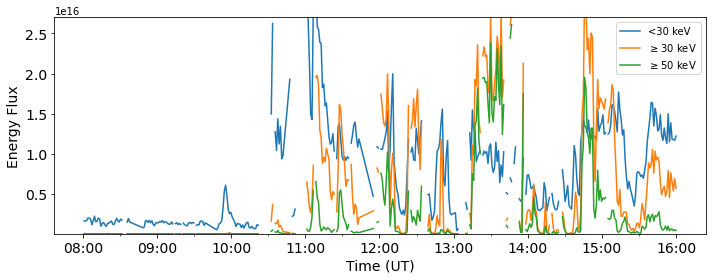

In [23]:
#launch_time = dt(2022, 3, 5, 11, 27)

# Setup the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plots
ax.plot(times, low_energy, label='<30 keV')
ax.plot(times, high_energy, label = r'$\geq 30$ keV')
ax.plot(times, higher_energy, label=r'$\geq 50$ keV')

# Add line for launch of rocket
#ax.vlines(launch_time, 10**11, 0.4*10**17, color='red', label='LAMP launch!')

# Set axis limits
plt.ylim(10**11, 2.7*10**16)
#plt.ylim(10**11, 1.5*10**15)

# Plot times on x axis nicely
time_locator = mdates.MinuteLocator(byminute=[0],
                                    interval = 1)
minor_time_locator = mdates.MinuteLocator(byminute=[30])
ax.xaxis.set_minor_locator(minor_time_locator)
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(time_locator)
ax.xaxis.set_major_formatter(h_fmt)
ax.tick_params(labelsize=12)

ax.tick_params(axis='x', which='major', labelsize=14)
ax.tick_params(axis='y', which='major', labelsize=14)

# Axis titles
ax.set_xlabel('Time (UT)', fontsize=14)
ax.set_ylabel('Energy Flux', fontsize=14)

plt.legend()

plt.tight_layout()

#plt.savefig(proj_dir + 'figures/launch-day-energies.jpg', dpi=200)
#plt.savefig(proj_dir + '/energyflux_20220305_gledhill_2.jpg', dpi=200)